In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
sns.set()

生データの読み込み。（第１行が列名では無いことに注意。）

In [2]:
df = pd.read_csv('mydata002.csv', header=None)
df.head(100)

,0,1,2
0,26.3,15.503,1.91100
1,34.9,15.943,1.39830
2,43.8,16.441,1.02768
3,53.1,16.994,0.74553
4,62.0,17.523,0.55844
5,71.3,18.056,0.41561
6,80.6,18.635,0.31667
7,89.9,19.197,0.24289


列名を付ける。

In [3]:
df.columns = ['t', 'Rc', 'Rs']
df.head(2)

,t,Rc,Rs
0,26.3,15.503,1.9110
1,34.9,15.943,1.3983


生データをグラフにしておく。

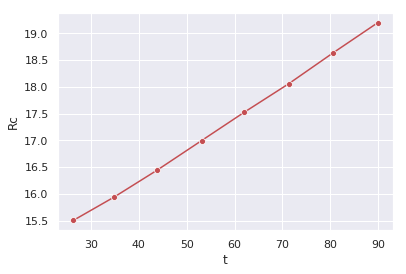

In [4]:
sns.lineplot(x='t', y='Rc', marker='o', color='r', data=df)

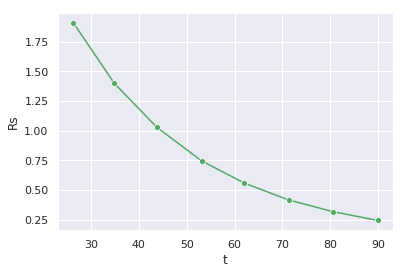

In [5]:
sns.lineplot(x='t', y='Rs', marker='o', color='g', data=df)

Rsは温度に対して直線的で無いので、あれこれ列をを増やす。

In [6]:
df['T'] = df['t'] + 273.15
df['T_inv'] = 1.0 / df['T']
df['Rs_log'] = np.log(df['Rs'])
df.head(100)

,t,Rc,Rs,T,T_inv,Rs_log
0,26.3,15.503,1.91100,299.45,0.003339,0.647627
1,34.9,15.943,1.39830,308.05,0.003246,0.335257
2,43.8,16.441,1.02768,316.95,0.003155,0.027304
3,53.1,16.994,0.74553,326.25,0.003065,-0.293660
4,62.0,17.523,0.55844,335.15,0.002984,-0.582608
5,71.3,18.056,0.41561,344.45,0.002903,-0.878008
6,80.6,18.635,0.31667,353.75,0.002827,-1.149895
7,89.9,19.197,0.24289,363.05,0.002754,-1.415147


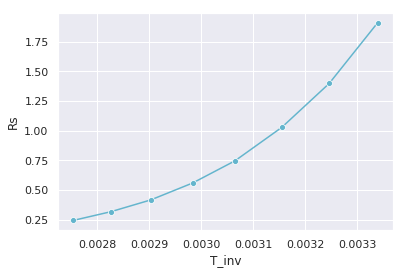

In [7]:
sns.lineplot(x='T_inv', y='Rs', marker='o', color='c', data=df)

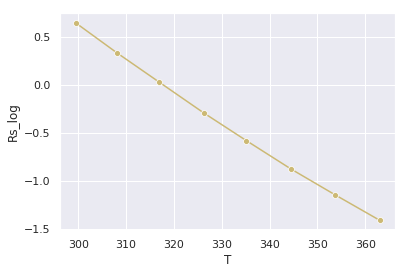

In [8]:
sns.lineplot(x='T', y='Rs_log', marker='o', color='y', data=df)

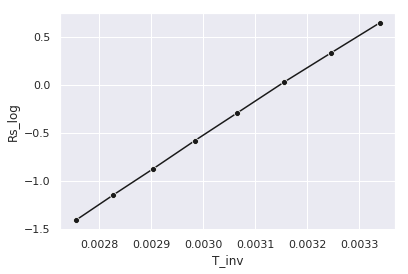

In [9]:
sns.lineplot(x='T_inv', y='Rs_log', marker='o', color='k', data=df)

# 最小自乗法

## 銅線

[0.05842778]
-2.0465210695411926


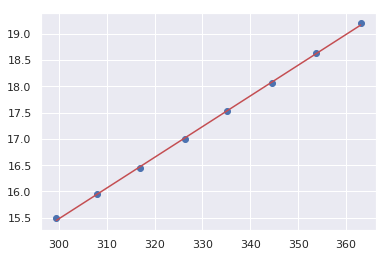

In [10]:
reg = linear_model.LinearRegression()
X = df['T'].values.reshape(-1, 1)
Y = df['Rc'].values
reg_fit = reg.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, reg.predict(X), 'r')
print(reg_fit.coef_)
print(reg_fit.intercept_)

傾きと$y$切片の値は、Report003.ipynbの数値に近い。


## サーミスタ

[-0.02488553]
9.061324718903599


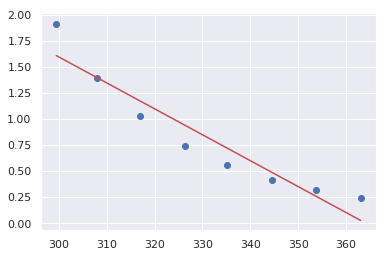

In [11]:
reg = linear_model.LinearRegression()
X = df['T'].values.reshape(-1, 1)
Y = df['Rs'].values
reg_fit = reg.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, reg.predict(X), 'r')
print(reg_fit.coef_)
print(reg_fit.intercept_)

[2750.30931723]
-7.51814613779828


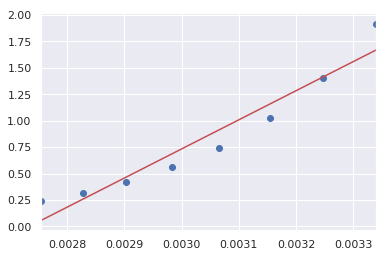

In [12]:
fig, ax = plt.subplots()
reg = linear_model.LinearRegression()
X = df['T_inv'].values.reshape(-1, 1)
Y = df['Rs'].values
reg_fit = reg.fit(X, Y)
ax = plt.scatter(X, Y)
ax = plt.plot(X, reg.predict(X), 'r')
plt.xlim(X.min(), X.max())
print(reg_fit.coef_)
print(reg_fit.intercept_)

[3535.99121249]
-11.14276769278197


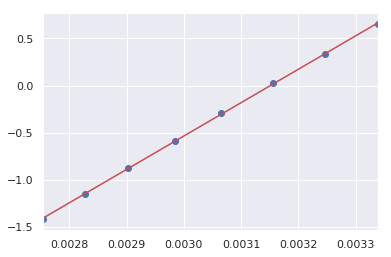

In [13]:
reg = linear_model.LinearRegression()
X = df['T_inv'].values.reshape(-1, 1)
Y = df['Rs_log'].values
reg_fit = reg.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, reg.predict(X), 'r')
plt.xlim(X.min(), X.max())
print(reg_fit.coef_)
print(reg_fit.intercept_)